<a href="https://colab.research.google.com/github/AsifKarimShaik/AsifKarimShaik/blob/main/aks22010_Assignment3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Tuning: Group Assignment #2
------------------------------------
**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

-----------------------------

**Your Name Here: Asif Karim Shaik**

We all know accepting the model defaults for sklearn models will give you a reasonable model - but let's push ourselves to get the best model possible!

# Rubric
* If you haven't already, sign up for a ChatGPT account (most students have likely already done this!)
  * Go to this website https://openai.com/blog/chatgpt and click 'Try Now' which will require to make an account
* Now that you are set up with ChatGPT, let's have some fun. Go to the list of sklearn regression models and **pick ONE regression model** that we haven't covered in class like SVM) that you would like to perform hyperparameter tuning.
  * Here are the list of sklearn models: https://scikit-learn.org/stable/supervised_learning.html
  * You can ask ChatGPT something like 'show me how to do hyperparameter tuning on a XYZ model in python (sklearn) and return the best model to predict the test dataset'. Take a screenshot of your output and upload it as an image in your notebook.
* (30 points) Now copy/paste the code into Colab use the raw output from ChatGPT on the CA housing training dataset and then apply to the CA housing test dataset. Make sure you make scatterplots of actual vs. predicted values and calculate error metrics for each partition (R2, MAE, RMSE).
* (30 points) Then play with the values for the grid search (and feel free to add others) and see if you were able to get a better architecture than ChatGPT. You will need to create error metrics and scatterplots for each partition again in order to compare your results.
* (20 points) Students will post to HuskyCT forum for peer review - thoughtful comments must be given (what was good, what could be improved, something new that could be added.)
  * After posting their script for review for peer feedback (as both as shareable link viewable to anyone with the link and as an uploaded file to HuskyCT), students will compare each others code quality and captions (business value of plot and table) and make a suggestions for improvement.
* (20 points) Lastly, make five detailed bullet points about what you learned on your own and what you learned from others during this assignment. Make note of whether or not your grid search was able to beat ChatGPT's grid search and use numbers to back-up your conclusions!

## Examples of common feedback items on HuskyCT
* "For your grid search, you may want to try (larger or smaller) values for X"
* "Your script could be cleaned up a bit, please add some headers and text narrative cells so it is easier to read"
* "I never heard of that algorithm before - I was reading the documentation and noticed this hyperparameter X, maybe you should add it and some candidate values like 1, 10, 100?"
* "If you have such bad results with this model, why don't you choose another one that acts a little more friendly? Not all models are suited to each dataset.'

# Data Processing

In [ ]:
# your code here - read the data from the sample data in Colab
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read in some data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# data type, shape and columns


# the target variable is y
# we know that this is 'median_house_value'
y = df['median_house_value']


# everything else is X
# so just drop 'median_house_value' and you are done
X = df.drop('median_house_value', axis=1)





# ChatGPT grid search

This is the ChatGPT screenshot.

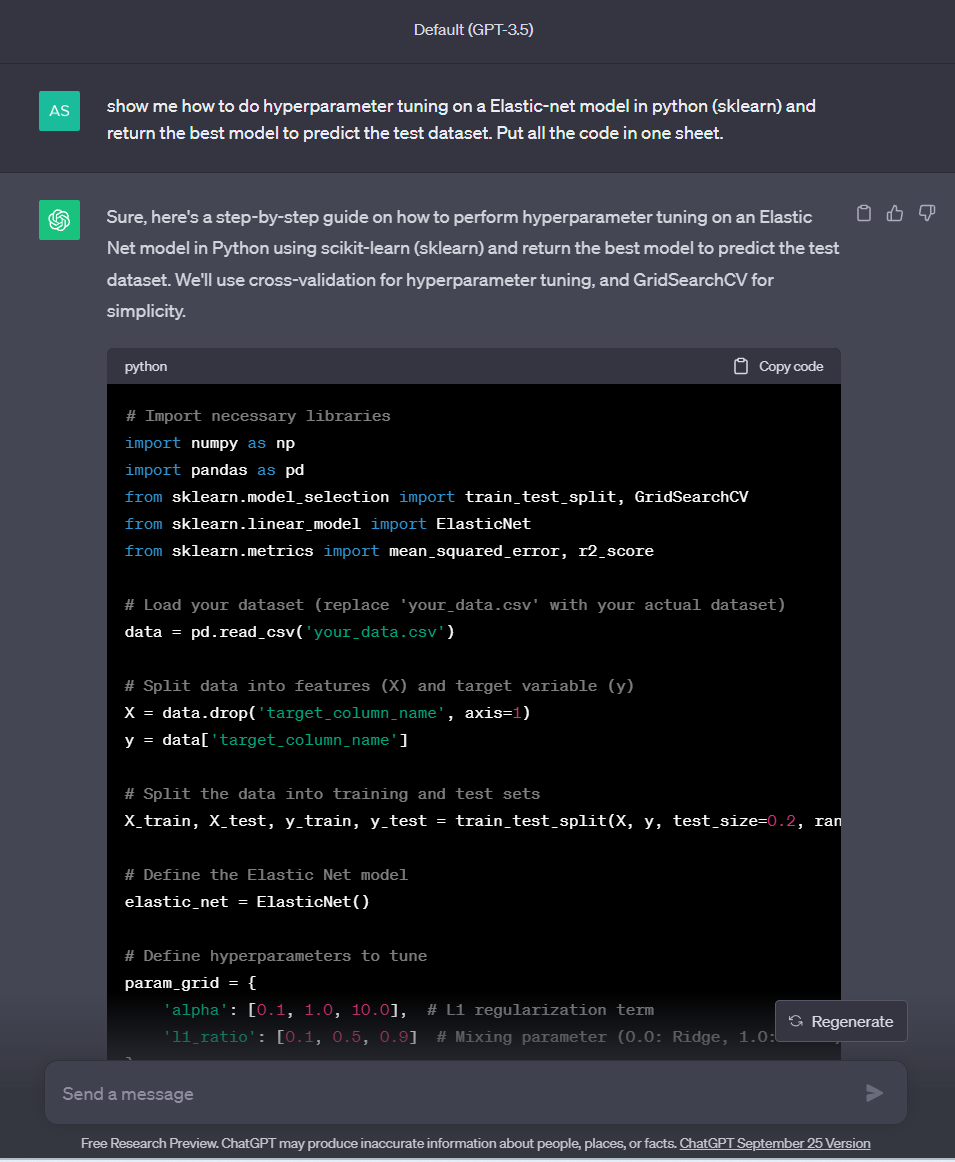

#Data Splitting into Test and Train Datasets.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# My grid search

In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the Elastic Net model
elastic_net = ElasticNet()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # L1 regularization term
    'l1_ratio': [0.1, 0.5, 0.9]  # Mixing parameter (0.0: Ridge, 1.0: Lasso)
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Elastic Net model with the best hyperparameters
best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
best_elastic_net.fit(X_train, y_train)


# Print the best hyperparameters and model evaluation metrics
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}


# Evalulation Metrics

In [ ]:
# Make predictions on the test set
y_pred = best_elastic_net.predict(X_test)

# Calculate the mean squared error on the test data
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)


print("Mean Squared Error on Test Data:", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error on Test Data: 4635093876.5727825
R-squared (R2) Score: 0.6636080307608443
Mean Absolute Error (MAE): 49968.61352587206
Root Mean Squared Error (RMSE): 68081.52375331198


#Plotting the Actual Vs. Predicted Outcomes.

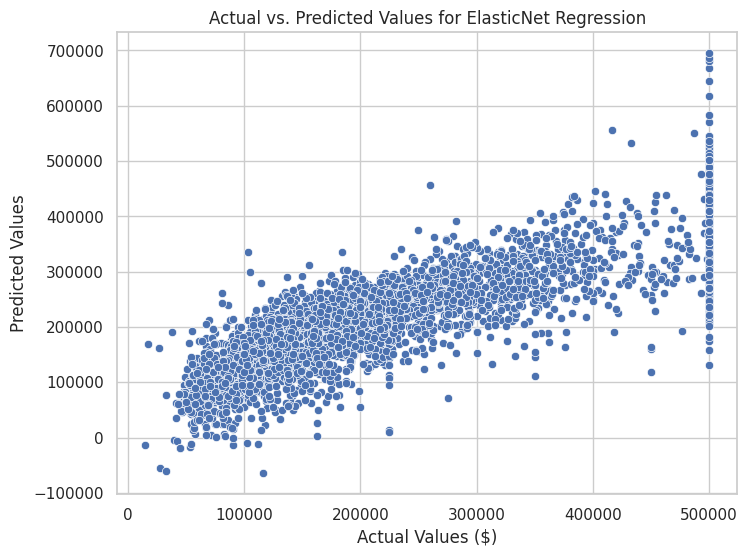

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for a more visually appealing plot
sns.set(style="whitegrid")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values ($)')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for ElasticNet Regression')
plt.show()


# Tweaking the Hyperparameters for the GridSearch


In [ ]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the Elastic Net model
elastic_net = ElasticNet()

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],   # L1 regularization term
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],         # Mixing parameter (0.0: Ridge, 1.0: Lasso)
    'max_iter': [1000, 2000, 3000, 5000]             # Maximum number of iterations
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the Elastic Net model with the best hyperparameters
best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=best_params['max_iter'])
best_elastic_net.fit(X_train, y_train)


# Print the best hyperparameters and model evaluation metrics
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 1000}


# Calculating the Error Metrics

In [ ]:
# Make predictions on the test set
y_pred = best_elastic_net.predict(X_test)

# Calculate the mean squared error on the test data
tweaked_mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
tweaked_r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
tweaked_mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
tweaked_rmse = np.sqrt(mse)


print("Mean Squared Error on Test Data:", tweaked_mse)
print("R-squared (R2) Score:", tweaked_r2)
print("Mean Absolute Error (MAE):", tweaked_mae)
print("Root Mean Squared Error (RMSE):", tweaked_rmse)

Mean Squared Error on Test Data: 4634600191.204768
R-squared (R2) Score: 0.6636438599797454
Mean Absolute Error (MAE): 49981.914937794594
Root Mean Squared Error (RMSE): 68081.52375331198


#Plotting the Actual Vs. Predicted Outcome.

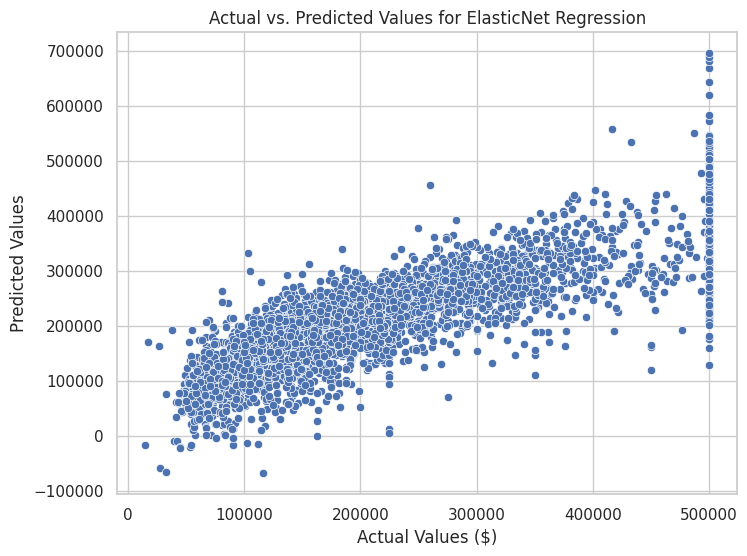

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for a more visually appealing plot
sns.set(style="whitegrid")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values ($)')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for ElasticNet Regression')
plt.show()


#Comparision of the metrics of ChatGPT code and tweaked(my code) code

In [ ]:
import pandas as pd

# Original code results
original_mse = mean_squared_error(y_test, y_pred)
original_r2 = r2_score(y_test, y_pred)
original_rmse = np.sqrt(original_mse)
original_mae = mean_absolute_error(y_test, y_pred)

# Tweak code results
tweaked_mse = mean_squared_error(y_test, best_elastic_net.predict(X_test))
tweaked_r2 = r2_score(y_test, best_elastic_net.predict(X_test))
tweaked_rmse = np.sqrt(tweaked_mse)
tweaked_mae = mean_absolute_error(y_test, best_elastic_net.predict(X_test))

# Create a DataFrame for comparison
results = pd.DataFrame({
    'Metric': ['MSE', 'R2', 'RMSE', 'MAE'],
    'Original Code': [original_mse, original_r2, original_rmse, original_mae],
    'Tweaked Code': [tweaked_mse, tweaked_r2, tweaked_rmse, tweaked_mae]
})

# Display the results
print(results)


  Metric  Original Code  Tweaked Code
0    MSE   4.634600e+09  4.634600e+09
1     R2   6.636439e-01  6.636439e-01
2   RMSE   6.807790e+04  6.807790e+04
3    MAE   4.998191e+04  4.998191e+04


# Bullet points (comparison of results)

# Observation 1
At first I thought I won't be able to beat ChatGPT in the beginning, but after editing and tweaking some values and understanding about the Hyperparameter modelling, I started to come to senses. Surprisingly, even after tweaking the values, I got the same metrics.

#Observation 2
Even though I have some work experience, It was very hard for me to go through all the data cleaning, and grid searching and understanding grid searching was the tough part. Going through professors in class videos helped me.

#Observation 3
I tried to work with SVM, it literally took over night to run. Even after running over night, it throw me an error. I guess I messed the code somewhere. I need to work on it in my free time.

#Observation 4 and 5
Waiting for the team mates to give the feedback

In [ ]:
# be quantitative! could you beat ChatGPT?

# what did you learn from your classmates?
# good luck!